<a href="https://colab.research.google.com/github/DevCielo/neural-networks-from-scratch/blob/main/Neural_Networks_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bulding CNN's with tensorflow and from scratch**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# LeNet-5 with tensorflow


In [ ]:
def LeNet5():
  model = tf.keras.Sequential([
      # Convolution Layer
      tf.keras.layers.Conv2D(6, (5, 5), activation='tanh', strides=(1, 1), padding='valid', name='conv0'),
      # Average Pooling Layer
      tf.keras.layers.AveragePooling2D((2,2), strides=(2,2), name='avg_pool0'),
      # Convolution Layer
      tf.keras.layers.Conv2D(16, (5, 5), strides=(1,1), padding='valid', activation='tanh', name='conv1'),
      # Average Pooling Layer
      tf.keras.layers.AveragePooling2D((2,2), strides=(2,2), name='avg_pool1'),
      # Convolution Layer
      tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='valid', activation='tanh', name='conv2'),
      # Flatten the output
      tf.keras.layers.Flatten(),
      # Fully Connected Layer
      tf.keras.layers.Dense(84, activation='tanh', name='fc1'),
      tf.keras.layers.Dense(10, activation='softmax', name='output'),
  ])

  return model

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
844/844 [==============================] - 11s 7ms/step - loss: 0.2843 - accuracy: 0.9160 - val_loss: 0.1045 - val_accuracy: 0.9712
Epoch 2/10
844/844 [==============================] - 6s 8ms/step - loss: 0.1050 - accuracy: 0.9672 - val_loss: 0.0706 - val_accuracy: 0.9800
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0711 - accuracy: 0.9785 - val_loss: 0.0712 - val_accuracy: 0.9795
Epoch 4/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0602 - val_accuracy: 0.9835
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.0588 - val_accuracy: 0.9852
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0545 - val_accuracy: 0.9847
Epoch 7/10
844/844 [==============================] - 5s 6ms/step - loss: 0.0277 -

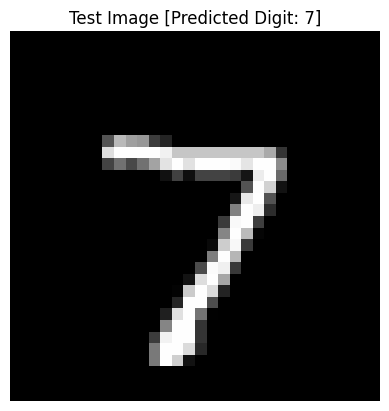

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (32, 32, 1) to match the input shape of LeNet-5
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Zero-pad the images to 32x32
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Create the model
model = LeNet5()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make a prediction on the first test image
prediction = model.predict(test_images[0:1])
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")

# Show the test image
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title(f"Test Image [Predicted Digit: {predicted_digit}]")
plt.axis('off')
plt.show()

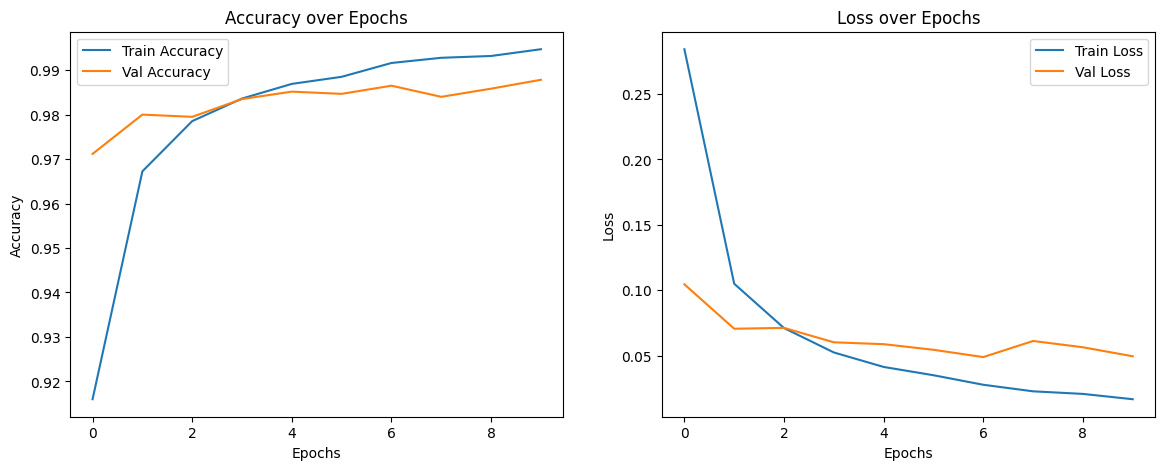

In [ ]:
# Plot the training and validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# LeNet-5 from scratch

In [ ]:
def conv2d(input, filters, bias, stride=1, padding=0):
  # decompose the filters shape into the filter size (f) and the number of filters (n_f)
  (n_f, f, f, n_c) = filters.shape
  # decomposes the input shape into the input dimensions (in_dim) and the number of channels (n_c)
  (in_dim, in_dim, n_c) = input.shape

  # calculates the output dimensions using formula ((n+2p-f)/s + 1)
  # int to floor function
  out_dim = int((in_dim + 2*padding-f)/stride) + 1

  # sets the new output shape to be out_dim*out_dim*n_f
  output = np.zeros((out_dim, out_dim, n_f))

  # adds padding to the height and width but none to the number of channels
  input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values = (0,0))

  # for every filter, performs the convolution by calculated the height/width start and ends and suming over their values to produce an output
  for i in range(n_f):
    for h in range(out_dim):
      for w in range(out_dim):
        h_start = h*stride
        h_end = h_start + f
        w_start = w*stride
        w_end = w_start + f
        output[h, w, i] = np.sum(input_padded[h_start:h_end, w_start:w_end, :] * filters[i]) + bias[i]

  return output


In [ ]:
# Example usage of conv2d function (Equal to first step in LeNet-5)
input = np.random.randn(32, 32, 1)
filters = np.random.randn(6, 5, 5, 1)
bias = np.random.randn(6)
output = conv2d(input, filters, bias, stride=1, padding=0)
print(output.shape)
# Expected Output: (28, 28, 6)

(28, 28, 6)


In [ ]:
def average_pooling(input, size=2, stride=2):
  (in_dim, in_dim, n_c) = input.shape

  out_dim = int((in_dim - size)/ stride) + 1

  output = np.zeros((out_dim, out_dim, n_c))

  for c in range(n_c):
    for h in range(out_dim):
      for w in range(out_dim):
        h_start = h * stride
        h_end = h_start + size
        w_start = w * stride
        w_end = w_start + size
        output[h, w, c] = np.mean(input[h_start:h_end, w_start:w_end, c])

  return output


In [ ]:
# Example usage after first convolution (Equal to second step in LeNet-5)
input = np.random.randn(28, 28, 6)
output = average_pooling(input, size=2, stride=2)
print(output.shape)
# Expected Output: (14, 14, 6)

(14, 14, 6)


In [ ]:
def fully_connected(input, weights, bias):
  return np.dot(weights, input) + bias

In [ ]:
# Example usage after flattening (Equal to second last step in LeNet-5)
input = np.random.randn(120)
weights = np.random.randn(84, 120)
bias = np.random.randn(84)
output = fully_connected(input, weights, bias)
print(output.shape)
# Expected Output: (84,)

(84,)


In [ ]:
# Connecting developed functions into a class
class LeNet5:
    def __init__(self):
        # randomly initialized weights and biases
        self.conv1_filters = np.random.randn(6, 5, 5, 1)
        self.conv1_bias = np.random.randn(6)

        self.conv2_filters = np.random.randn(16, 5, 5, 1)
        self.conv2_bias = np.random.randn(16)

        self.conv3_filters = np.random.randn(120, 5, 5, 1)
        self.conv3_bias = np.random.randn(120)

        self.fc1_weights = np.random.randn(84, 120)
        self.fc1_bias = np.random.randn(84)

        self.fc2_weights = np.random.randn(10, 84)
        self.fc2_bias = np.random.randn(10)

    # forward propagation
    def forward(self, x):
        # first layer
        x = conv2d(x, self.conv1_filters, self.conv1_bias, stride=1, padding=0)
        x = np.tanh(x)
        x = average_pooling(x, size=2, stride=2)

        # second layer
        x = conv2d(x, self.conv2_filters, self.conv2_bias, stride=1, padding=0)
        x = np.tanh(x)
        x = average_pooling(x, size=2, stride=2)

        # third layer
        x = conv2d(x, self.conv3_filters, self.conv3_bias, stride=1, padding=0)
        x = np.tanh(x)

        # flattening layer
        x = x.flatten()

        # fully connected layer
        x = fully_connected(x, self.fc1_weights, self.fc1_bias)
        x = np.tanh(x)

        # output layer
        x = fully_connected(x, self.fc2_weights, self.fc2_bias)
        x = softmax(x)

        return x

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Create the model
lenet5 = LeNet5()

# Example input (32x32 grayscale image)
input = np.random.randn(32, 32, 1)
output = lenet5.forward(input)
print(output)

[7.19463559e-06 1.22890605e-12 2.72176646e-03 2.33723429e-03
 9.93731174e-01 9.70665888e-09 9.09720479e-04 2.72347045e-04
 2.05530302e-05 2.93459152e-11]


In [ ]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (32, 32, 1) to match the input shape of LeNet-5
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Zero-pad the images to 32x32
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


11490434/11490434 [==============================] - 0s 0us/step


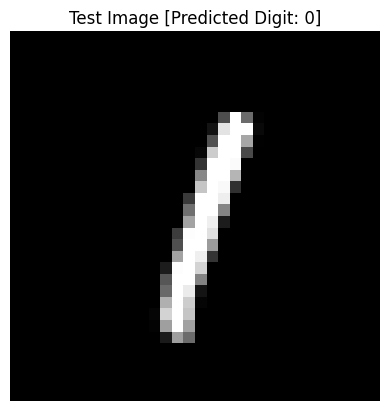

In [ ]:
# Forward pass on a single example and identify the predicted digit
output = lenet5.forward(test_images[6])
predicted_digit = np.argmax(output)  # Find the index of the highest probability

plt.imshow(test_images[6].squeeze(), cmap='gray')
plt.title(f"Test Image [Predicted Digit: {predicted_digit}]")
plt.axis('off')
plt.show()